In [393]:
# Import Libraries
import pandas as pd
import numpy as np
import scipy.signal as signal
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

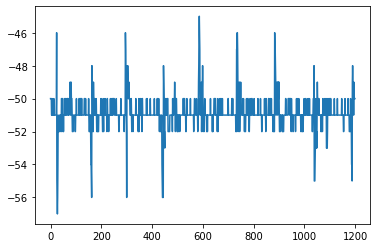

In [394]:
data = np.genfromtxt("./data/raw_sample.csv", delimiter=',')
data
plt.plot(data)
plt.show()

In [395]:
def norm(data):
    new_data = np.array([])
    maxr = max(data)
    minr = min(data)
    
    for i, y in enumerate(data):
        new_data = np.append(((y-minr) / (maxr - minr)), new_data)
    return new_data

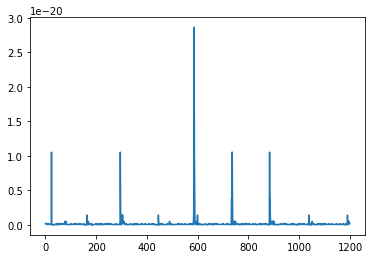

In [396]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

sig_data = sigmoid(data)
plt.plot(sig_data)
plt.show()

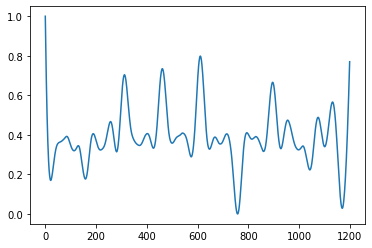

[-49.82769843 -49.95317942 -50.07532191 ... -49.66909926 -49.43962896
 -49.19299922]


In [397]:
data = signal.savgol_filter(data, 51, 3)
data = signal.savgol_filter(data, 51, 3)
data = signal.savgol_filter(data, 51, 3)
plt.plot(norm(data))
plt.show()
print(data)

[  67  124  184  244  303  370  405  484  531  588  658  738  797  887
  942 1010 1069 1114]
[-50.39103576 -50.60484051 -51.00456924 -50.64428648 -50.11563136
 -50.87324671 -50.81963737 -50.83546204 -50.88041491 -49.74988736
 -50.8242339  -49.92559476 -50.83124426 -50.01018245 -50.66399443
 -50.83308586 -51.00076719 -50.87043012]


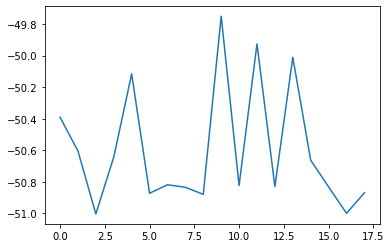

In [398]:
peaks, _ = signal.find_peaks(data)
print(peaks)
print(data[peaks])
plt.plot(data[peaks])

plt.show()

[ 2 16  8  5 17  7 15 12 10  6 14  3  1  0  4 13 11  9]
[ 184 1069  531  370 1114  484 1010  797  658  405  942  244  124   67
  303  887  738  588]
[ 184 1069  531  370 1114  484 1010  797  658  942  244  124   67  303
  887  738  588]
[  67  124  184  244  303  370  484  531  588  658  738  797  887  942
 1010 1069 1114]


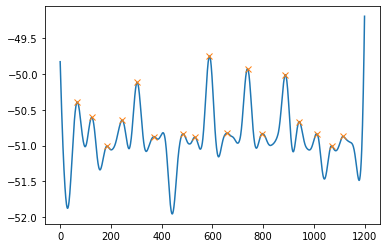

In [399]:
indices = np.argsort(data[peaks])
print(indices)

sorted_peaks = peaks[indices]
print(sorted_peaks)
def isNoise(new_peaks, peak, tau = 40):
    for p in new_peaks:
        maxr = p + tau
        minr = p - tau
        if minr <= peak <= maxr:
            return True
    return False
    

new_peaks = np.array([], dtype=np.int)
for i, peak in enumerate(sorted_peaks):
    if peak == sorted_peaks[0]: 
        new_peaks = np.append(new_peaks, peak)
        continue
    
    if isNoise(new_peaks, peak):
        continue
    else:
        new_peaks = np.append(new_peaks, peak)

print(new_peaks)
new_peaks = np.sort(new_peaks)
print(new_peaks)
x = np.arange(0,1200,1)
plt.plot(x, data)
plt.plot(new_peaks, data[new_peaks], 'x')
plt.show()

In [400]:
def pad_zeros(data, maxlen = 200, pad = int(0)):
    new_data = data.copy()
    num_pad = maxlen - len(data)
    for _ in range(num_pad):
        new_data = np.append(new_data, pad)
    return new_data

def normaliseHeartbeat(heartbeat):
    y_data = pad_zeros(norm(heartbeat))
    x_data = np.arange(0, len(y_data), 1)
    return x_data, y_data

def getHeartbeats(peaks, data, maxlen=200):
    heartbeats = []
    for i, peak in enumerate(peaks):
        if i == 0: continue
        if peak > peaks[i-1]:
            mu = peak - peaks[i-1]
            minr = int(peak - 0.5 * mu)
            maxr = int(peak + 1.5 * mu)
            heartbeat = data[minr:maxr]
            if len(heartbeat) < maxlen:
                heartbeats.append(normaliseHeartbeat(heartbeat))
        else:
            continue
    return heartbeats

200


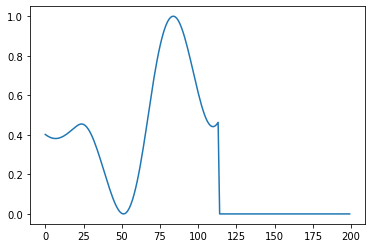

200


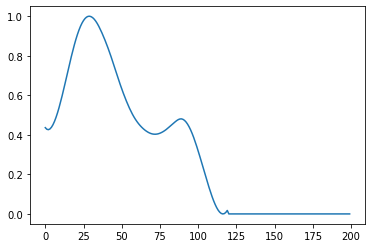

200


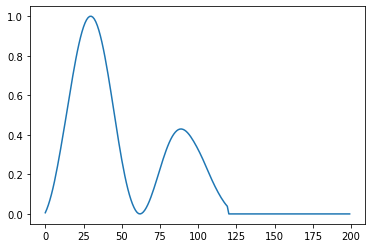

200


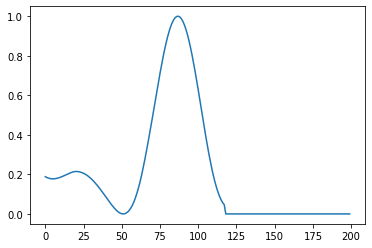

200


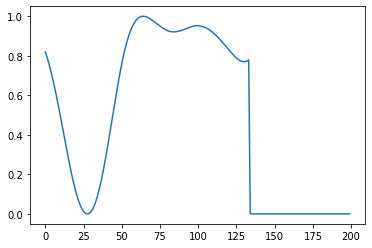

200


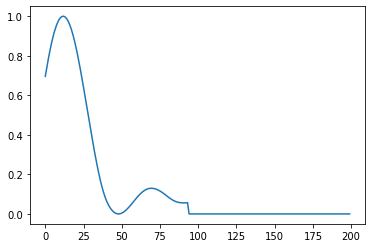

200


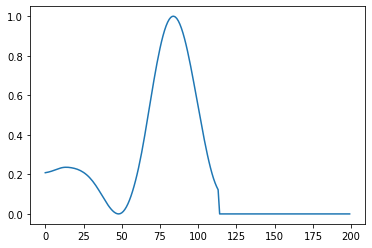

200


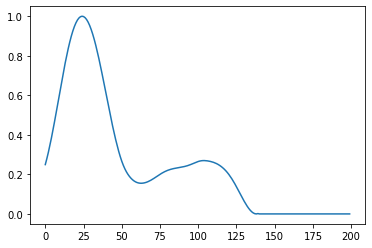

200


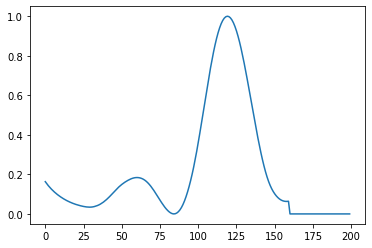

200


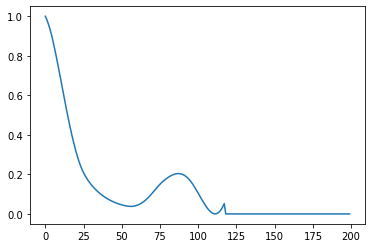

200


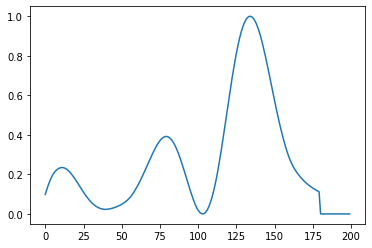

200


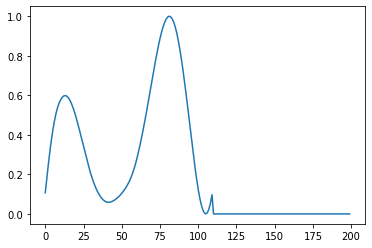

200


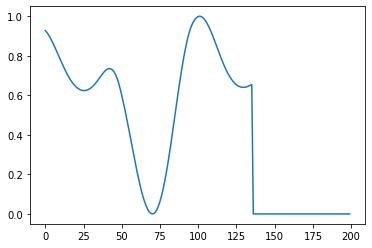

200


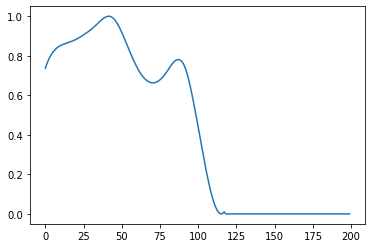

200


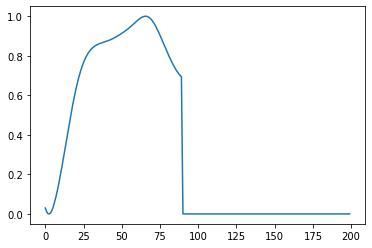

In [401]:
heartbeats = getHeartbeats(new_peaks, data)
for heartbeat in heartbeats:
    x, y = heartbeat
    print(len(x))
    plt.plot(x, y)
    plt.show()

In [387]:
def saveHeartbeats(heartbeats):
    np.savetxt("foo.csv", heartbeats, delimiter=',')

np_heartbeats = np.asarray(heartbeats)
print(np_heartbeats.shape)
np_heartbeats = np_heartbeats[:, 1, :]
print(np_heartbeats)
print(np_heartbeats.shape)
saveHeartbeats(np_heartbeats)

(15, 2, 200)
[[0.43375791 0.42630178 0.42006219 ... 0.         0.         0.        ]
 [0.62418243 0.60704433 0.59401484 ... 0.         0.         0.        ]
 [0.04925967 0.07699402 0.10717752 ... 0.         0.         0.        ]
 ...
 [0.94477856 0.93542781 0.92548093 ... 0.         0.         0.        ]
 [0.50809944 0.5522221  0.5938815  ... 0.         0.         0.        ]
 [0.08503436 0.04905659 0.02333179 ... 0.         0.         0.        ]]
(15, 200)
